<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v1.5.0demos1?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fggbunch.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/ggbunch.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

# GGBunch

*GGBunch* allows to show a collection of plots on one figure. Each plot in the collection can have arbitrary location and size. Where is no automatic layot inside the bunch.



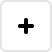
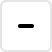
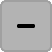
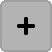
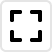
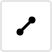
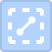

In [1]:
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

In [2]:
cov=[[1, 0], 
     [0, 1]]     
x, y = np.random.multivariate_normal(mean=[0,0], cov=cov, size=400).T

data = dict(
    x = x,
    y = y
)

### View this data as a scatter plot and as a histogram

In [3]:
p = ggplot(data) + ggsize(600,200)

scatter = p + geom_point(aes('x', 'y'), color='black', alpha=.4)
scatter

In [4]:
histogram = p + geom_histogram(aes('x', y = '..count..'), fill='dark_magenta')
histogram

### Combine both plots in one figure

In [5]:
# Set scale X limits manually because of computed automatically
# the scale used by each plot would be slightly different
# and the stacked plots wouldn't be aligned.
scale_x = scale_x_continuous(limits=[-3.5, 3.5])
bunch = GGBunch()
bunch.add_plot(histogram + scale_x, 0, 0)
bunch.add_plot(scatter + scale_x, 0, 200)
bunch

### Adjust visuals of the bunch figure

In [6]:
upper_theme = theme(axis_title_x='blank', axis_ticks_x='blank', axis_line='blank')
lower_theme = theme(axis_text_x='blank', axis_ticks_x='blank', axis_line='blank')

In [7]:
bunch1 = GGBunch()
bunch1.add_plot(histogram + upper_theme + scale_x, 0, 0)
bunch1.add_plot(scatter + lower_theme + scale_x, 0, 200)
bunch1

### Adjust plot sizes

*add_plot()* method has two more (optional) parameters: *width* and *height*.

This values will override plot size earlier defined via *ggsize()* function.

In [8]:
bunch2 = GGBunch()
bunch2.add_plot(histogram + upper_theme + scale_x, 0, 0, 600, 100)
bunch2.add_plot(scatter + lower_theme + scale_x, 0, 100, 600, 300)
bunch2